In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('applesOranges.csv')
df

,x.1,x.2,y
0,0.365,0.708,0
1,0.543,-0.268,0
2,-0.401,0.643,0
3,0.866,-0.796,0
4,-0.386,0.742,0
5,-0.443,0.615,0
6,-0.519,0.818,0
7,0.332,-0.211,0
8,0.211,-0.237,0
9,-0.208,-0.656,0


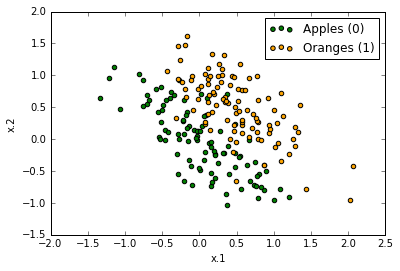

In [6]:
apples = df[df['y'] == 0]
oranges = df[df['y'] == 1]
plt.scatter(apples['x.1'], apples['x.2'], c='green', label='Apples (0)')
plt.scatter(oranges['x.1'], oranges['x.2'], c='orange', label='Oranges (1)')
plt.xlabel('x.1')
plt.ylabel('x.2')
plt.legend()

In [9]:
alphas = np.linspace(0, 180, 19)
print alphas
acc_alphas = np.zeros(19)
for i, alpha in enumerate(alphas):
    w = np.array([np.cos(np.radians(alpha)), np.sin(np.radians(alpha))])
    #print w
    y = np.sign(np.dot(w,  df[['x.1', 'x.2']].T))
    y[y < 0] = 0  # set -1 to 0 in the output, so we have the correct labels
    acc_alphas[i] = np.mean(y == df['y'])

[   0.   10.   20.   30.   40.   50.   60.   70.   80.   90.  100.  110.
  120.  130.  140.  150.  160.  170.  180.]


(0, 1)

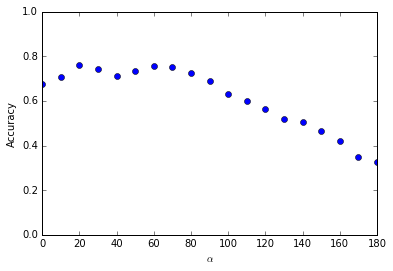

In [10]:
plt.plot(alphas, acc_alphas, 'o')
plt.xlabel(r'$\alpha$')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

Best accuracy for alpha = 20 degrees

In [11]:
w = np.array([np.cos(np.radians(20.)), np.sin(np.radians(20.))])
biases = np.linspace(-3., 3., 21)
print biases
acc_biases = np.zeros(21)
for i, bias in enumerate(biases):
    y = np.sign(np.dot(w,  df[['x.1', 'x.2']].T) - bias)
    y[y < 0] = 0  # set -1 to 0 in the output, so we have the correct labels
    #print y
    acc_biases[i] = np.mean(y == df['y'])

[-3.  -2.7 -2.4 -2.1 -1.8 -1.5 -1.2 -0.9 -0.6 -0.3  0.   0.3  0.6  0.9  1.2
  1.5  1.8  2.1  2.4  2.7  3. ]


(0, 1)

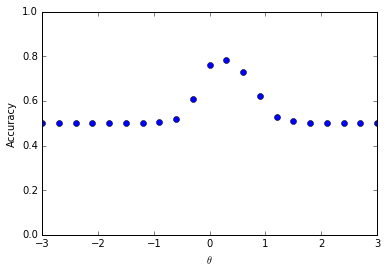

In [12]:
plt.plot(biases, acc_biases, 'o')
plt.xlabel(r'$\theta$')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

Best accuracy for theta = 0.3 (if alpha = 20 degrees)

In [13]:
w = np.array([np.cos(np.radians(20.)), np.sin(np.radians(20.))])
bias = 0.3
y = np.sign(np.dot(w,  df[['x.1', 'x.2']].T) - bias)
y[y < 0] = 0  # set -1 to 0 in the output, so we have the correct labels

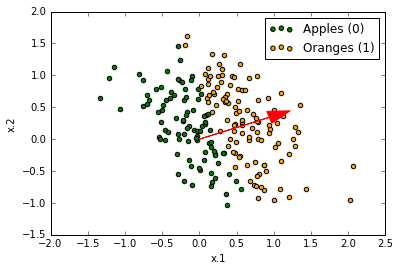

In [15]:
apples = df[y == 0]
oranges = df[y == 1]  # choose class based on prediction
plt.scatter(apples['x.1'], apples['x.2'], c='green', label='Apples (0)')
plt.scatter(oranges['x.1'], oranges['x.2'], c='orange', label='Oranges (1)')
plt.arrow(0, 0, w[0], w[1], head_width=0.2, color='r')
plt.xlabel('x.1')
plt.ylabel('x.2')
plt.legend()

The separating plane is approximately orthogonal to $w$ and shifted slightly in its direction.
This makes sense, as any samples $x$ on the separating plane should have $w^T x - \theta = 0$. 
If they are orthogonal to $w$, $w^T x = 0$. The bias $\theta = 0.3$ introduces the slight offset. 

In [20]:
alphas = np.linspace(0, 180, 101)
biases = np.linspace(-5., 5., 101)
print alphas, biases

acc_both = np.zeros((101, 101))
best_acc = 0
best_alpha = None
best_bias = None

for i, alpha in enumerate(alphas):
    w = np.array([np.cos(np.radians(alpha)), np.sin(np.radians(alpha))])
    for j, bias in enumerate(biases):
        y = np.sign(np.dot(w,  df[['x.1', 'x.2']].T) - bias)
        y[y < 0] = 0  # set -1 to 0 in the output, so we have the correct labels
        acc_both[i, j] = np.mean(y == df['y'])
        if acc_both[i, j] > best_acc:
            best_acc = acc_both[i, j]
            best_alpha = alpha
            best_bias = bias

print 'Best alpha:', best_alpha
print 'Best bias:', best_bias

[   0.     1.8    3.6    5.4    7.2    9.    10.8   12.6   14.4   16.2
   18.    19.8   21.6   23.4   25.2   27.    28.8   30.6   32.4   34.2
   36.    37.8   39.6   41.4   43.2   45.    46.8   48.6   50.4   52.2
   54.    55.8   57.6   59.4   61.2   63.    64.8   66.6   68.4   70.2
   72.    73.8   75.6   77.4   79.2   81.    82.8   84.6   86.4   88.2
   90.    91.8   93.6   95.4   97.2   99.   100.8  102.6  104.4  106.2
  108.   109.8  111.6  113.4  115.2  117.   118.8  120.6  122.4  124.2
  126.   127.8  129.6  131.4  133.2  135.   136.8  138.6  140.4  142.2
  144.   145.8  147.6  149.4  151.2  153.   154.8  156.6  158.4  160.2
  162.   163.8  165.6  167.4  169.2  171.   172.8  174.6  176.4  178.2
  180. ] [-5.  -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1 -4.  -3.9 -3.8 -3.7 -3.6
 -3.5 -3.4 -3.3 -3.2 -3.1 -3.  -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3 -2.2 -2.1
 -2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7 -0.6
 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0

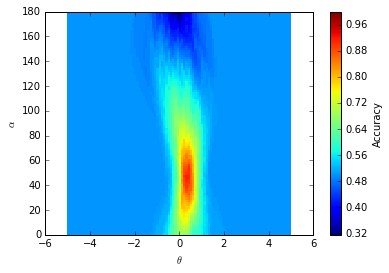

In [21]:
plt.pcolor(biases, alphas, acc_both, vmax=1)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\alpha$')
plt.colorbar(label='Accuracy')

This method (grid search) can in principle be applied to any kind of  optimization, however it is computationally very intense if there are lots of parameters (e.g. tuning the parameters of a neural network with grid search would be a very bad idea).